**Projeto com dados extraidos do Kaggle de pessoas com diabetes no qual estima se vai desenvolver a doença de acordo com algumas características**
**link dos df diabetes** <https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?select=diabetes.csv>

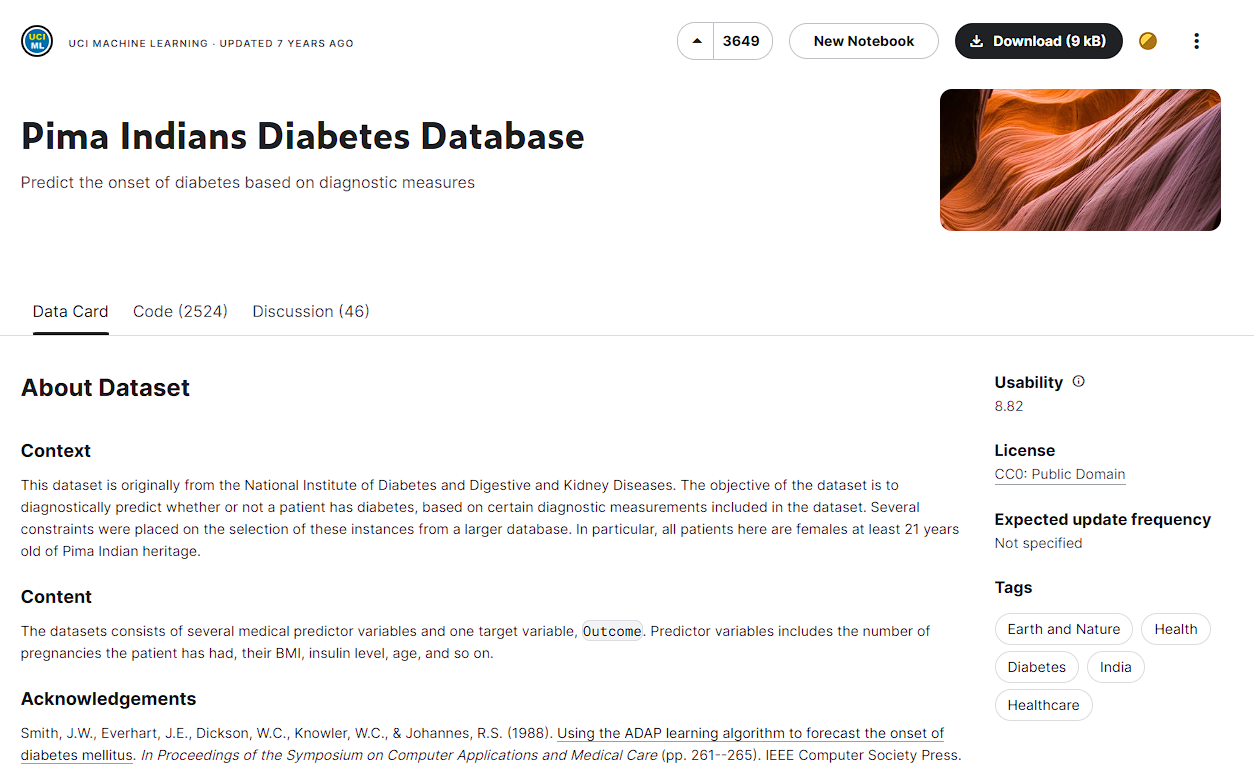


# **Tópicos**

1.   Instalando e carregando bibliotecas
2.   Extração de dados
3.   Tratamento de dados
4.   Teste/treino




**1.   Instalando e carregando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error


**1. Extração de dados**







In [ ]:
#df para testar sem padronização
df1 = pd.read_csv('diabetes.csv')

#df para testar com padronização
df = pd.read_csv('diabetes.csv')

 **2. Tratamento de dados**

In [ ]:
#retirando linhas nulas se houver
df = df.dropna().reset_index(drop = True)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#retirando algumas colunas do df
df = df.drop(df[['Pregnancies','SkinThickness', 'DiabetesPedigreeFunction']], axis = 1)


In [ ]:
#padronizando
media = df['Insulin'].mean()
print(media)

desvio_padrao = df['Insulin'].std()
print(desvio_padrao)

df['Insulin_padr'] = df['Insulin'].apply(lambda x: (x - media)/ desvio_padrao)

79.79947916666667
115.24400235133817


In [ ]:
#padronizando
media = df['Glucose'].mean()
print(media)

desvio_padrao = df['Glucose'].std()
print(desvio_padrao)

df['Glucose_padr'] = df['Glucose'].apply(lambda x: (x - media)/ desvio_padrao)

120.89453125
31.97261819513622


In [ ]:
#padronizando
media = df['BloodPressure'].mean()
print(media)

desvio_padrao = df['BloodPressure'].std()
print(desvio_padrao)

df['BloodPressure_padr'] = df['BloodPressure'].apply(lambda x: (x - media)/ desvio_padrao)

69.10546875
19.355807170644777


In [ ]:
#padronizando
media = df['BMI'].mean()
print(media)

desvio_padrao = df['BMI'].std()
print(desvio_padrao)

df['BMI_padr'] = df['BMI'].apply(lambda x: (x - media)/ desvio_padrao)

31.992578124999998
7.884160320375446


In [ ]:
#padronizando
media = df['Age'].mean()
print(media)

desvio_padrao = df['Age'].std()
print(desvio_padrao)

df['Age_padr'] = df['Age'].apply(lambda x: (x - media)/ desvio_padrao)

33.240885416666664
11.760231540678685


In [ ]:
#retirando colunas não tratadas
df = df.drop(df[['Glucose','Insulin','BloodPressure', 'BMI', 'Age']], axis = 1)


In [ ]:
df

,Outcome,Insulin_padr,Glucose_padr,BloodPressure_padr,BMI_padr,Age_padr
0,1,-0.692439,0.847771,0.149543,0.203880,1.425067
1,0,-0.692439,-1.122665,-0.160441,-0.683976,-0.190548
2,1,-0.692439,1.942458,-0.263769,-1.102537,-0.105515
3,0,0.123221,-0.997558,-0.160441,-0.493721,-1.040871
4,1,0.765337,0.503727,-1.503707,1.408828,-0.020483
...,...,...,...,...,...,...
763,0,0.869464,-0.622237,0.356200,0.115094,2.530487
764,0,-0.692439,0.034575,0.046215,0.609757,-0.530677
765,0,0.279412,0.003299,0.149543,-0.734711,-0.275580
766,1,-0.692439,0.159683,-0.470426,-0.240048,1.169970


**4. Teste/treino**

In [ ]:
#variáveis padronizadas
x_train_pdr, x_test_pdr, y_train_pdr, y_test_pdr = train_test_split(
    df.drop(['Outcome'], axis=1), 
    df['Outcome'], 
    test_size=0.25, 
    random_state=123
)

In [ ]:
#variáveis sem padronização
x_train, x_test, y_train, y_test = train_test_split(
    df1.drop(['Outcome'], axis=1), 
    df1['Outcome'], 
    test_size=0.25, 
    random_state=123
)

Testando o os dados Padronizado e não padronizados

In [ ]:
modelo = LogisticRegression()

modelo.fit(x_train_pdr, y_train_pdr)

treino_padr = modelo.predict(x_train_pdr)

LogisticRegression()

In [ ]:
#treinando o modelo com dados
modelo.fit(x_train, y_train)
treino = modelo.predict(x_train)

c:\Users\wuisl\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#teste com o df padronizado
print('O resultado foi de: {:.1f}%'.format(modelo.score(x_train_pdr,y_train_pdr)*100))

O resultado foi de: 76.4%


In [ ]:
#teste com o df sem padronização
print('O resultado foi de: {:.1f}%'.format(modelo.score(x_train,y_train)*100))

O resultado foi de: 77.3%


**Observação: O df sem padronização apresentou melhor desempenho, seguiremos utilizando sem dados padronizados**

In [ ]:
print('O resultado foi de: {:.1f}%'.format(modelo.score(x_test,y_test)*100))

O resultado foi de: 79.7%


In [ ]:
#modelo.fit(x_train, y_train)
teste = modelo.predict(x_test)
teste

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [ ]:
#testando a prob. de acerto com dados de teste
teste_percentil = modelo.predict_proba(x_test)


In [ ]:
#comparação entre o que é dado real e o que foi previsto
print('Valor empirico:  |   Valor previsto:   |   Probabilidade da previsão  \n')
for i in range(len(y_test)):
    print('     -  ', list(y_test)[i], '      -         ', teste[i], '         -     ', teste_percentil[i])

Valor empirico:  |   Valor previsto:   |   Probabilidade da previsão  

     -   1       -          1          -      [0.14283487 0.85716513]
     -   0       -          1          -      [0.41486876 0.58513124]
     -   0       -          1          -      [0.34820962 0.65179038]
     -   0       -          0          -      [0.94600978 0.05399022]
     -   0       -          0          -      [0.93587262 0.06412738]
     -   1       -          1          -      [0.31170254 0.68829746]
     -   1       -          1          -      [0.05597316 0.94402684]
     -   1       -          0          -      [0.50737125 0.49262875]
     -   1       -          1          -      [0.44219454 0.55780546]
     -   0       -          0          -      [0.63407677 0.36592323]
     -   1       -          1          -      [0.10329938 0.89670062]
     -   0       -          0          -      [0.74957281 0.25042719]
     -   0       -          0          -      [0.79519198 0.20480802]
     -   0       -

In [ ]:
#coeficientes de variáveis explicativas
importancia_variavel = modelo.coef_
importancia_variavel

array([[ 1.21534849e-01,  3.18077715e-02, -1.17788029e-02,
        -4.84750904e-04, -1.33796535e-03,  8.30119663e-02,
         1.59505257e+00,  9.73854841e-03]])

In [ ]:
#nomes das variáveis explicativas
nomes_variaveis = df1.columns[:-1]
nomes_variaveis

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [ ]:
#significância de variáveis explicativas
variaveis_explicativas = pd.DataFrame(data= importancia_variavel, columns= nomes_variaveis).T
variaveis_explicativas.sort_values(by=[0])

,0
BloodPressure,-0.011779
Insulin,-0.001338
SkinThickness,-0.000485
Age,0.009739
Glucose,0.031808
BMI,0.083012
Pregnancies,0.121535
DiabetesPedigreeFunction,1.595053


In [ ]:
#concatenando os dois df com dados previsto e dados empíricos
test_data = pd.concat([x_test, pd.DataFrame(y_test, columns=['Outcome'])], axis=1).reset_index(drop=True)
test_data['predicted'] = False

prediction_data = pd.concat([x_test.reset_index(drop=True), pd.DataFrame(y_test, columns=['Outcome'])], axis=1).reset_index(drop=True)
prediction_data['predicted'] = True

prediction = pd.concat([test_data, prediction_data]).reset_index(drop=True)

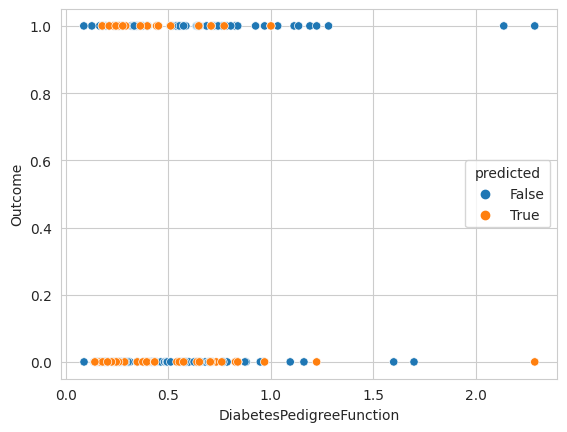

In [ ]:
with sns.axes_style('whitegrid'):

  # peso = 88.9746 * altura - 80.2631
  sns.scatterplot(data=prediction, x='DiabetesPedigreeFunction', y='Outcome', hue='predicted')

**Observação: De acordo com o gráfico é possível notar uma correlação entre as saídas do modelo e os dados empíricos, ratificando a precisão do modelo**